### Problem Statemnt :
    
  we will use Titanic dataset from Kaggle. Using variables like gender, age, class of ticket and few other variables with a logistic regression model, we predict if they **survived or not** by checking our accuracy to predict

### Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, log_loss, auc

### Reading the Datasets

We shall work with the train.csv file which is extracted from the Kaggle website named as titanic. The dataset contains the following features:
    
  - PassengerId - Id of the passenger
    
  - survival - Survival 0 = No, 1 = Yes

  - pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

  - survival - Survival 0 = No, 1 = Yes

  - pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

  - Name - Name of the Passenger
  
  - sex - Sex
  
  - Age - Age in years
  
  - sibsp - # of siblings / spouses aboard the Titanic

  - parch - # of parents / children aboard the Titanic
  
  -  ticket - Ticket number
  
  - fare - Passenger fare
    
  - cabin - Cabin number
  
  - embarked - Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
titanic_train = pd.read_csv('train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Drwaing insights from the data

Summary of the dataset gives us an clear idea of the dataset about mean, median, standard deviation

In [4]:
titanic_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Theobald, Mr. Thomas Leonard",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Insights:

  - There are total of 891 observations in the train data.
  
  - Some of the columns contains null values mainly age and embarked and cabin

### Dealing with the missing values

In [5]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As there are large number of missing values in the dataset, we should not drop the outliers. We should replace them with other alternative ways such as Mean, median or by means of any other imputation

First, we shall take the feature **Age**

#### Age - Missing Values

In [6]:
print('Percent of missing "Age" records is %.2f%%' %((titanic_train['Age'].isnull().sum()/titanic_train.shape[0])*100))

Percent of missing "Age" records is 19.87%


~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

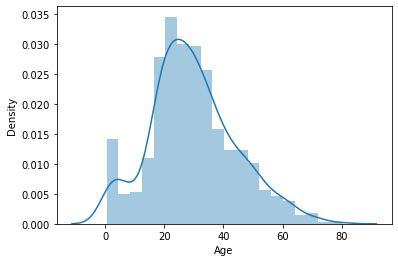

In [7]:
sns.distplot(titanic_train.Age)

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values

In [9]:
#copying the entire data into a new dataframe
train_data = titanic_train.copy()

#Replacing the null values in the new dataset with the median of the original dataset
train_data['Age'].fillna(titanic_train['Age'].median(skipna = True), inplace = True)

#### Cabin - Missing Values

In [10]:
print('Percent of missing "Cabin" records is %.2f%%' %((titanic_train['Cabin'].isnull().sum()/titanic_train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable by dropping that feature in our model.

In [11]:
train_data.drop('Cabin', axis = 1, inplace=True)

#### Embarked - Missing Values

In [12]:
print('Percent of missing "Embarked" records is %.2f%%' %((titanic_train['Embarked'].isnull().sum()/titanic_train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded which is also known as mode

S    644
C    168
Q     77
Name: Embarked, dtype: int64


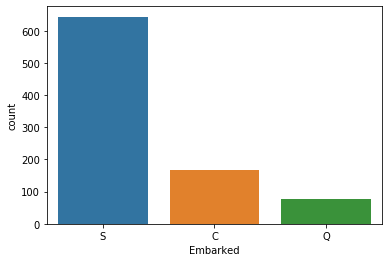

In [13]:
print(titanic_train['Embarked'].value_counts())
sns.countplot(titanic_train['Embarked'])

Here S indicates **Southampton**, C indicates **Cherbourg** and Q indicates **Queenstown**

So, From the above plot, we can see that most passengers boarded at Southampton. So we need to fill the two missing values by S

In [14]:
train_data['Embarked'].fillna(titanic_train['Embarked'].value_counts().idxmax(), inplace=True)

In [15]:
#Checking the missing values in the adjusted train data
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# preview adjusted train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


According to our knowledge, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

## Exploratory Data Analysis

Let's explore the data carefully by visualization of the plots with all the features vs Survived

### Exploration of Age

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

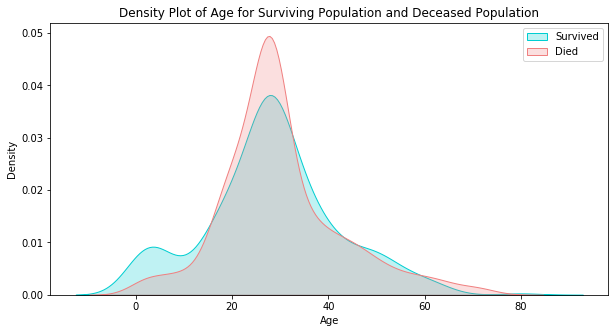

In [17]:
#Setting the figure size
plt.figure(figsize=(10,5))

#Plotting a KDE plot for Age vs Survived
ax = sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="lightcoral", shade=True)

#Legend for the two plots of survived or not survived
plt.legend(['Survived', 'Died'])

#Title
plt.title('Density Plot of Age for Surviving Population and Deceased Population')

#Naming the x-axis
ax.set(xlabel='Age')
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

### Exploration of Fare

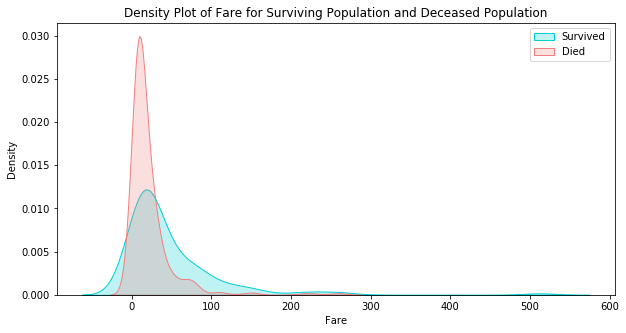

In [18]:
#Setting the figure size
plt.figure(figsize=(10,5))

#Plotting a KDE plot for Fare vs Survived
ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="lightcoral", shade=True)

#Legend for the two plots of survived or not survived
plt.legend(['Survived', 'Died'])

#Title
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')

#Naming the x-axis
ax.set(xlabel='Fare')
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive as their cabins are below and will not be clean and tidy. This will be probably strongly correlated with Passenger Class, which we'll look at next.

### Exploration of Pclass(Passenger Class)

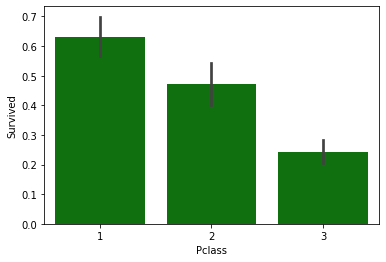

In [19]:
sns.barplot('Pclass', 'Survived', data=train_data, color="green")
plt.show()

Unsurprisingly, being a first class passenger was safest means first class passenger has a lot of facilities and importance in saving their lives when compared to other class passengers

### Exploration of Embarked

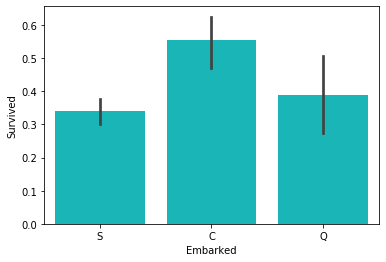

In [20]:
sns.barplot('Embarked', 'Survived', data=train_data, color="darkturquoise")
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).

### Exploration of Sex

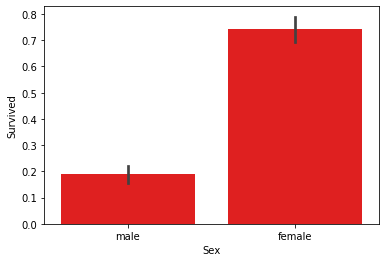

In [21]:
sns.barplot('Sex', 'Survived', data=train_data, color="red")
plt.show()

This is a very obvious difference. Clearly being female greatly increased your chances of survival.

### Plotting a heatmap to find the correlation between features

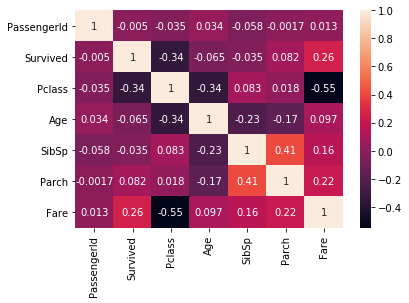

In [22]:
sns.heatmap(train_data.corr(), annot=True)

From the above heatmap, we can see that there is a strong relationship between Fare and survived, as the treatment level will obviously be based on the fare which leads to be most important in their survival who has purchased the ticket with high fare.

## Logistic Regression

### Model Evaluation using normal train/test split

In [23]:
# features and target
target = 'Survived'
features = ['Pclass', 'Age', 'SibSp', 'Fare']

# X matrix, y vector
X = train_data[features]
y = train_data[target]

In [24]:
# model 
model = LogisticRegression()
model.fit(X, y)
print('Accuracy score is : ', model.score(X,y))

Accuracy score is :  0.6980920314253648


From the above observations, we can see that we got an accuracy of **69.8%**

### Pickel Model

In [25]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))